About this Dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import plotly.express as px

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.drop('Id', axis=1, inplace = True)

In [13]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.shape

(150, 5)

In [17]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [18]:
df.drop_duplicates(inplace=True)

In [21]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [23]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [25]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

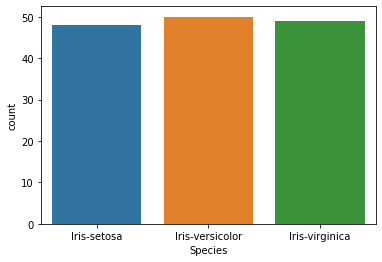

In [30]:
sns.countplot(data=df, x='Species');

In [32]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [34]:
px.box(data_frame=df, x='SepalLengthCm' )

In [35]:
px.box(data_frame=df, x='SepalWidthCm' )

Thier are 4 outlier in SepalWidthCm 

In [52]:
px.box(data_frame=df, x='PetalLengthCm')

In [37]:
px.box(data_frame=df, x='PetalWidthCm')

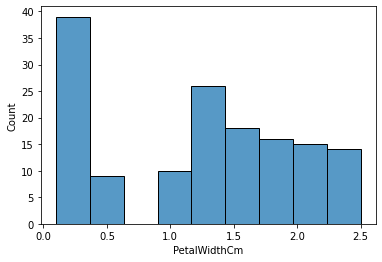

In [55]:
sns.histplot(data=df, x='PetalWidthCm');

In [58]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

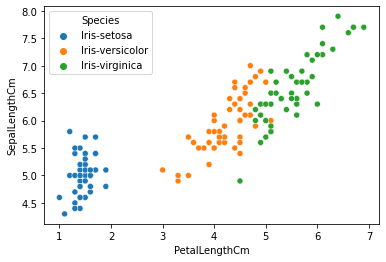

In [62]:
sns.scatterplot(data=df, x='PetalLengthCm', y='SepalLengthCm', hue='Species')

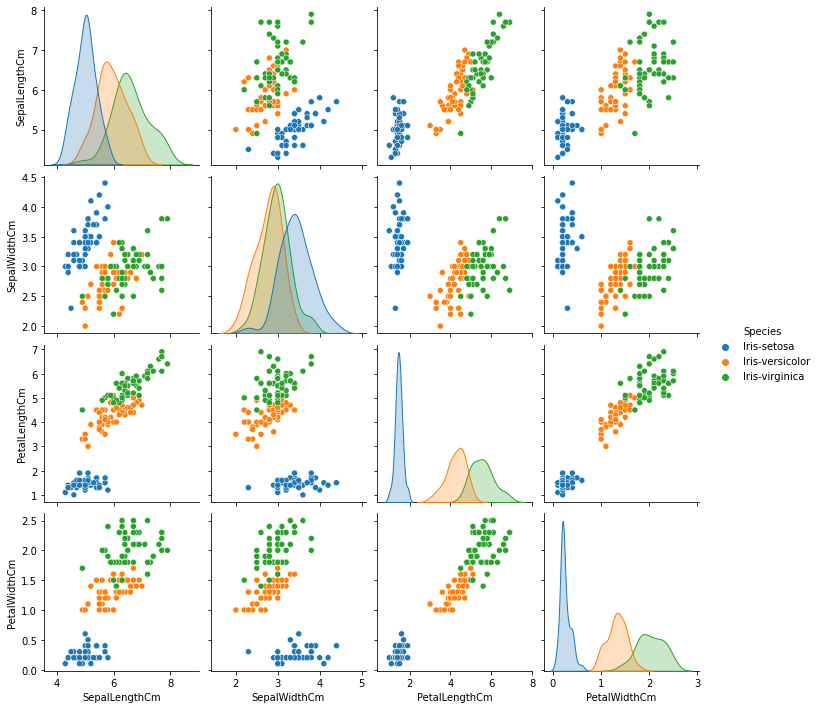

In [64]:
sns.pairplot(df,hue='Species')

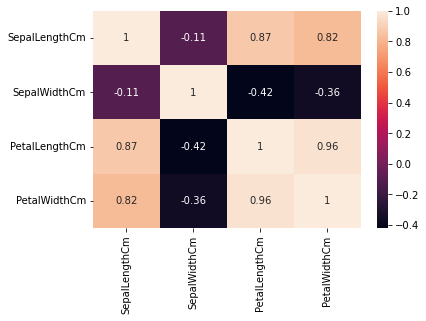

In [66]:
sns.heatmap(df.corr(),annot=True);

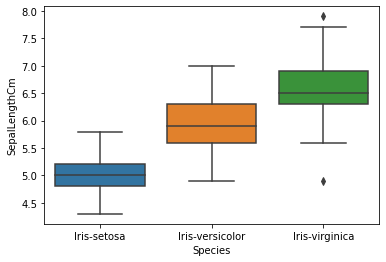

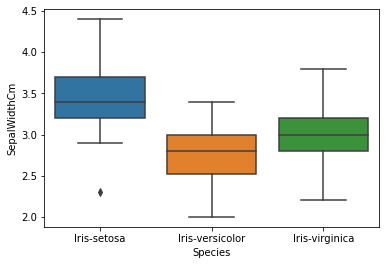

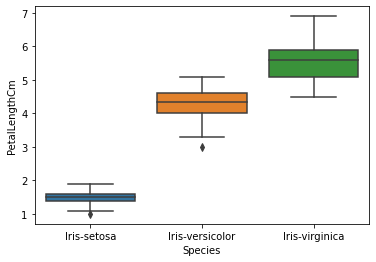

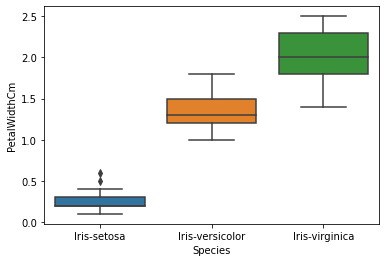

In [76]:
def graph(y):
    sns.boxplot(data=df,x='Species', y=y)
    plt.show()
columns =['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']    
for col in columns:
    graph(col)

### Remove outlier

(147, 5)
(143, 5)


<AxesSubplot:xlabel='SepalWidthCm'>

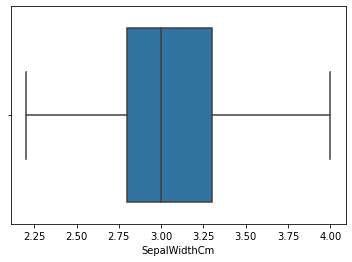

In [77]:
Q1 = np.percentile(df['SepalWidthCm'],25)
Q3 = np.percentile(df['SepalWidthCm'],75)
IQR= Q3-Q1

print(df.shape)

upper = df[df['SepalWidthCm']>=(Q3+1.5*IQR)].index
lower = df[df['SepalWidthCm']<=(Q1-1.5*IQR)].index

df.drop(upper, inplace =True)
df.drop(lower, inplace =True)

print(df.shape)
sns.boxplot(data=df, x='SepalWidthCm' )

In [80]:
df.to_csv('Clean_Iris_Dataset.csv')

## LogisticRegreesion

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [109]:
x= df.iloc[:,:-1]
y= df.loc[:,'Species']

In [110]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 143, dtype: object

In [113]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y.values.ravel())
y = pd.DataFrame(y, index= df.index, columns=['Species'])
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [115]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1, stratify=y)

In [117]:
y_test.value_counts()

Species
1          15
2          15
0          13
dtype: int64

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit(x_test)

In [134]:
LG = LogisticRegression(solver='saga')
LG.fit(x_train,y_train.values.ravel())
y_pred = LG.predict(x_test)

C:\Users\Sherif\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [135]:
y_pred

array([2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1,
       1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2],
      dtype=int64)

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



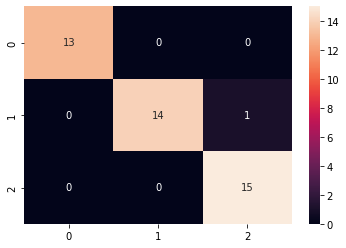

In [137]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True);

## KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train.values.ravel())
Y_pred = knn.predict(x_test)

In [157]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.95        43
   macro avg       0.96      0.96      0.96        43
weighted avg       0.95      0.95      0.95        43



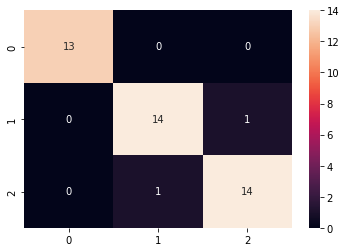

In [158]:
sns.heatmap(confusion_matrix(y_test,Y_pred), annot=True);

## Neural network

In [160]:
from sklearn.neural_network import MLPClassifier
knn = MLPClassifier()
knn.fit(x_train,y_train.values.ravel())
Y_pred = knn.predict(x_test)

C:\Users\Sherif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [161]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



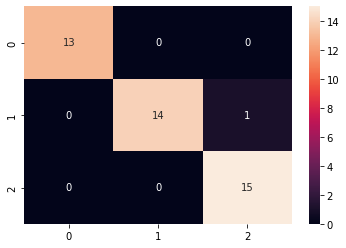

In [162]:
sns.heatmap(confusion_matrix(y_test,Y_pred), annot=True);